<a href="https://colab.research.google.com/github/rohithsuryaneni/Tweets-analysis-using-python/blob/main/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# read a CSV file using "read_csv" by pandas
data=pd.read_csv("/content/Most_followed_Twitter_acounts_2019 (1).csv")

In [ ]:
#get an overall review of the dataframe
data.head()

,Rank,Name,twitter handle,Followers,Following,Tweets,Nationality/headquarters,Activity,Industry
0,1,Barack Obama,@BarackObama,"11,08,90,048","6,10,113","15,704",U.S.A,Politician,Politics
1,2,KATY PERRY,@katyperry,"10,83,15,414",222,"10,202",U.S.A,Musician,Music
2,3,Justin Bieber,@justinbieber,"10,74,10,873","2,96,418","30,462",Canada,Musician,Music
3,4,Rihanna,@rihanna,"9,49,90,708","1,068","10,449",Barbados,Musician and businesswoman,Music
4,5,Taylor Swift,@taylorswift13,"8,55,20,236",0,396,U.S.A,Musician,Music


In [ ]:
data.info()
#get a basic information of the dataframe by using ".info()"
# it also tells us the number of NULL values containing in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Rank                      100 non-null    int64 
 1   Name                      100 non-null    object
 2   twitter handle            100 non-null    object
 3   Followers                 100 non-null    object
 4   Following                 100 non-null    object
 5   Tweets                    100 non-null    object
 6   Nationality/headquarters  100 non-null    object
 7   Activity                  100 non-null    object
 8   Industry                  100 non-null    object
dtypes: int64(1), object(8)
memory usage: 7.2+ KB


In [ ]:
# we can clearly can in data integers is seperated by using comas(",") and
# they are assigned as objects not as integers unlike "Rank"
data['Followers']=data['Followers'].str.replace(',', '').astype(int)
data['Following']=data['Following'].str.replace(',', '').astype(int)
data['Tweets']=data['Tweets'].str.replace(',', '').astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Rank                      100 non-null    int64 
 1   Name                      100 non-null    object
 2   twitter handle            100 non-null    object
 3   Followers                 100 non-null    int64 
 4   Following                 100 non-null    int64 
 5   Tweets                    100 non-null    int64 
 6   Nationality/headquarters  100 non-null    object
 7   Activity                  100 non-null    object
 8   Industry                  100 non-null    object
dtypes: int64(4), object(5)
memory usage: 7.2+ KB


In [ ]:
# if we observe we can see in 'Name' coloums some of them in lower case and some of them in upper case
# so let them change all the variables in same case(title)
data['Name']=data['Name'].str.title()

In [ ]:
data['Name']

0       Barack Obama
1         Katy Perry
2      Justin Bieber
3            Rihanna
4       Taylor Swift
           ...      
95    Anushka Sharma
96     Blake Shelton
97       Nicki Minaj
98      Ricky Martin
99    Mohamadalarefe
Name: Name, Length: 100, dtype: object

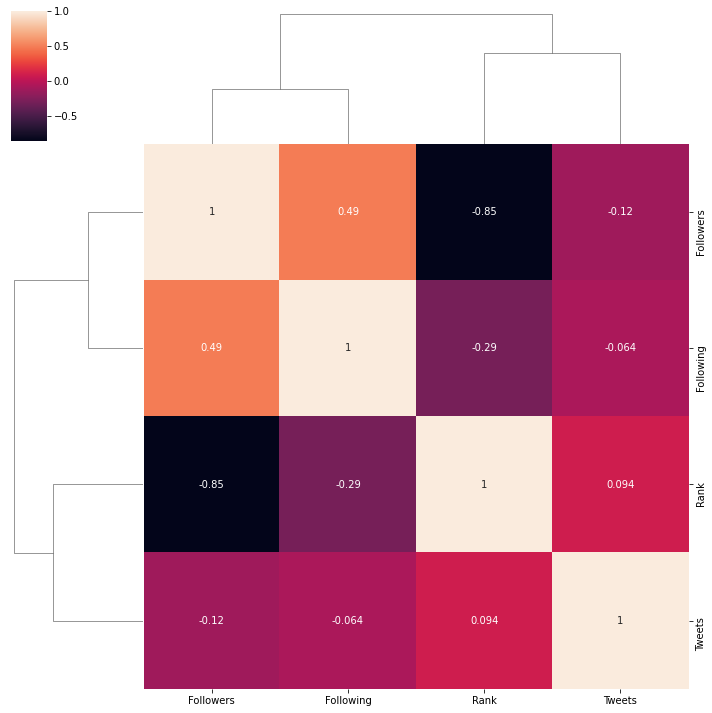

In [ ]:
sns.clustermap(data.drop(["Name",	"twitter handle",	"Nationality/headquarters" ,"Activity",	"Industry"],axis=1).corr(),annot=True)

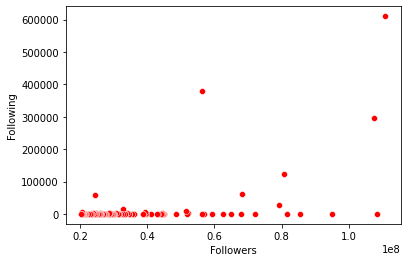

In [ ]:
sns.scatterplot(data=data,x="Followers",y="Following",color="red")
plt.rcParams['figure.figsize']=[9,5]
plt.show()

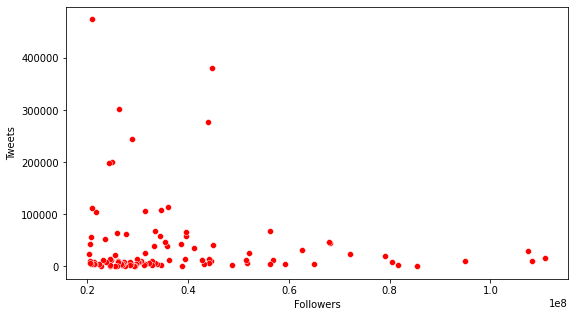

In [ ]:
sns.scatterplot(data=data,x="Followers",y="Tweets",color="red")
plt.rcParams['figure.figsize']=[9,5]
plt.show()

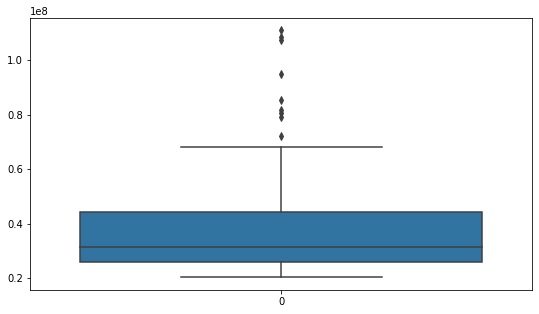

In [ ]:
sns.boxplot(data=data["Followers"])
plt.rcParams['figure.figsize']=[10,7]
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


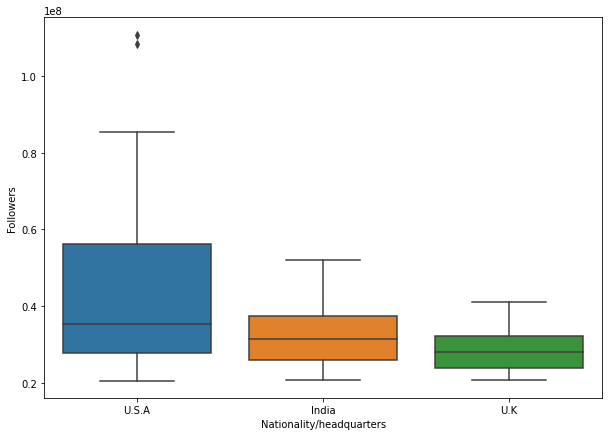

In [ ]:
data2=data[(data['Nationality/headquarters']=='U.S.A')|(data['Nationality/headquarters']=='U.K')|(data['Nationality/headquarters']=='India')]
x=data2['Nationality/headquarters']
y=data2['Followers']
sns.boxplot(x,y)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

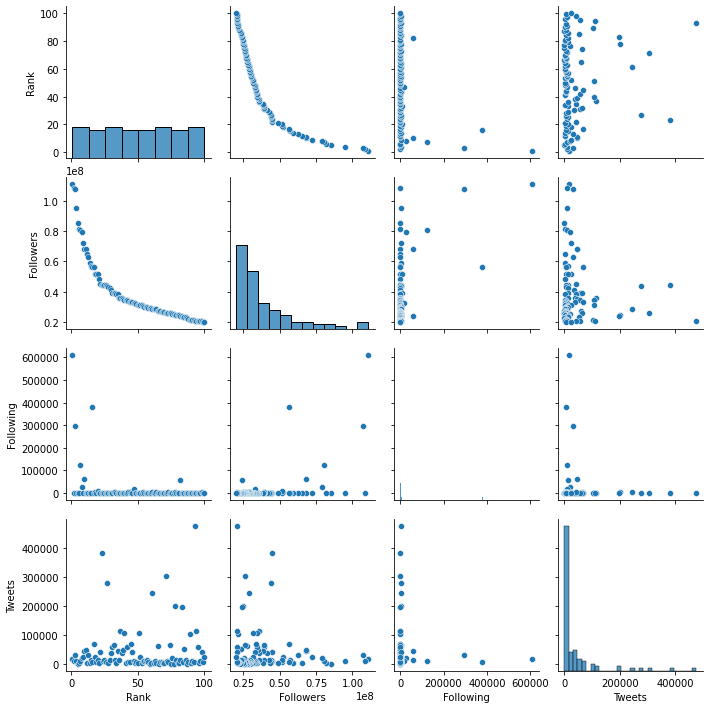

In [ ]:
sns.pairplot(data)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

Exploratory Data Analysis
1. Most followed personalities in 2019


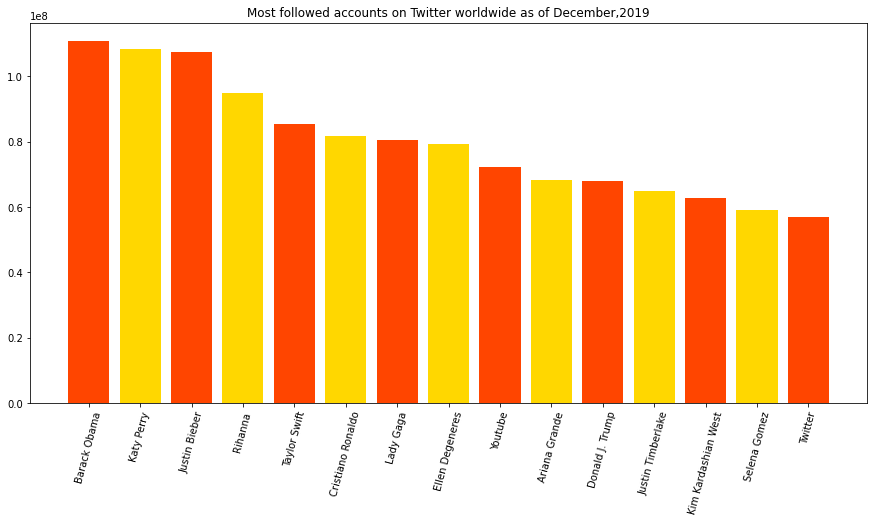

In [ ]:
x=data['Name'][:15]
y=data['Followers'][:15]
plt.bar(x,y,color=["orangered","gold"])
plt.title("Most followed accounts on Twitter worldwide as of December,2019")
plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[9,7]
plt.show()

2. Out of these, who follow the most people as of December 2019

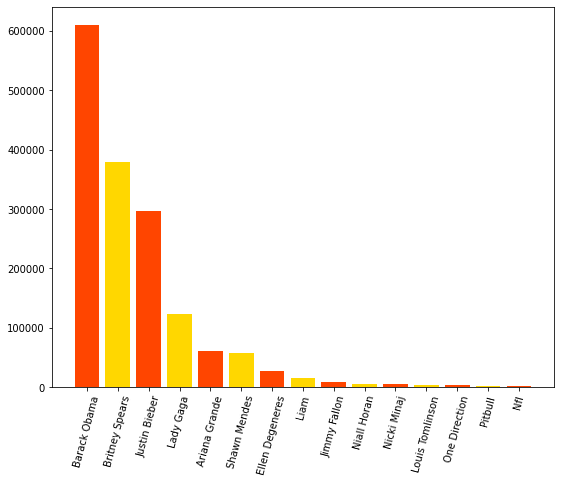

In [ ]:
data2=data.sort_values(by=['Following'],ascending=False)
x=data2['Name'][:15]
y=data2['Following'][:15]
plt.bar(x,y,color=["orangered","gold"])
plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

3. Countries of most popular Twitter personalities

In [ ]:
counts = data['Nationality/headquarters'].value_counts()
labels=counts.index
values=counts.values

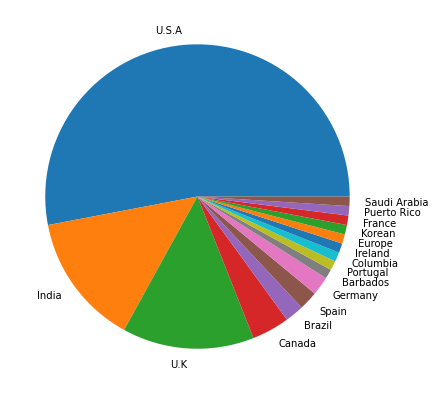

In [ ]:
plt.pie(values, labels = labels)
plt.rcParams['figure.figsize']=[15,10]
plt.show()

4. Industries of most popular Twitter personalities


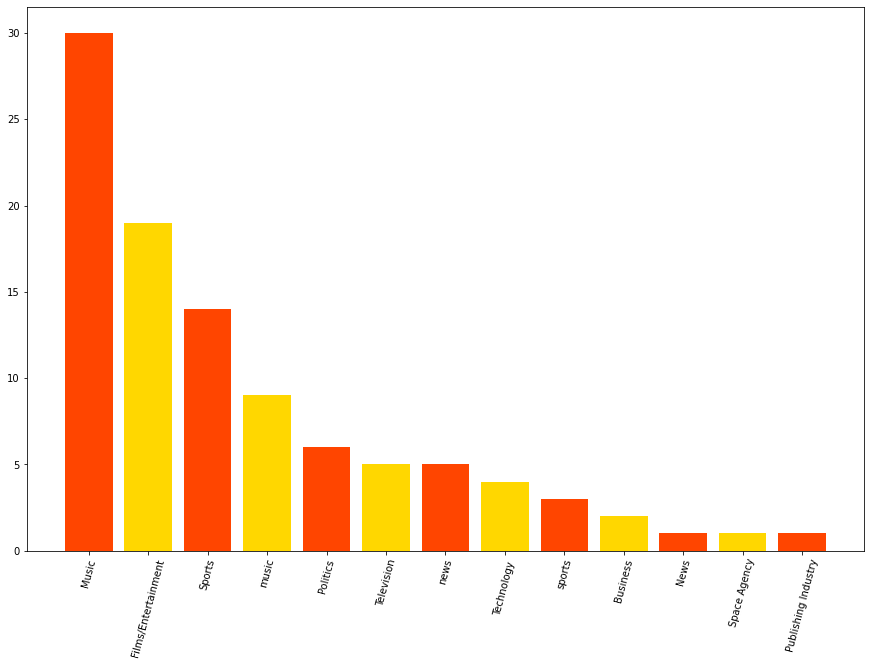

In [ ]:
counts = data['Industry'].value_counts()
x=counts.index
y=counts.values
plt.bar(x,y,color=["orangered","gold"])
plt.xticks(rotation=75)
#plt.legend(title="Country",loc="best")
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[10,5]
plt.show()

5. People who tweeted the most(out of the Top 100 most followed)

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9917 missing from current font.
  font.set_text(s, 0, flags=flags)


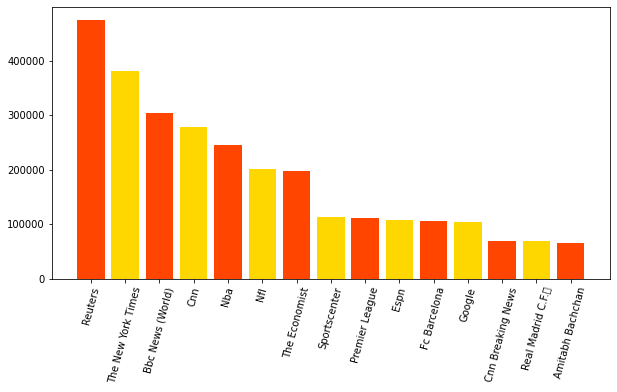

In [ ]:
data2=data.sort_values(by=['Tweets'],ascending=False)
x=data2['Name'][:15]
y=data2['Tweets'][:15]
plt.bar(x,y,color=["orangered","gold"])
plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

6. Most followed Musicians

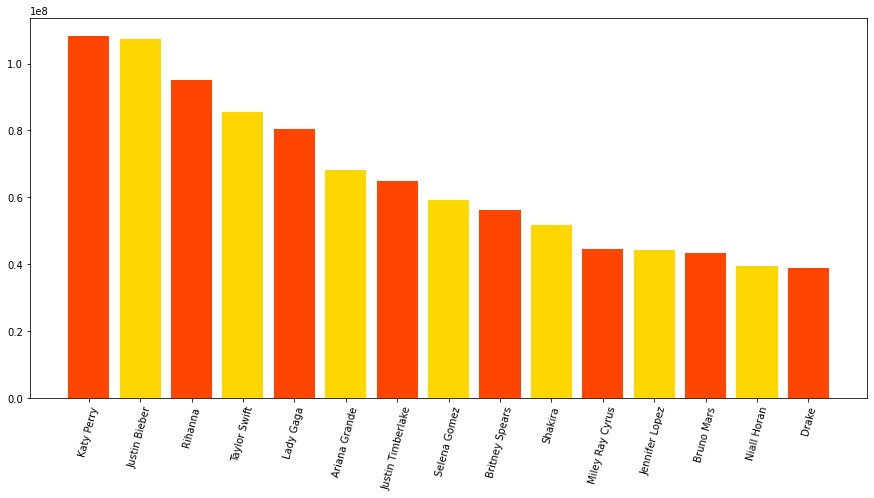

In [ ]:
data2=data[data['Industry']=='Music']
x=data2['Name'][:15]
y=data2['Followers'][:15]
plt.bar(x,y,color=["orangered","gold"])
plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


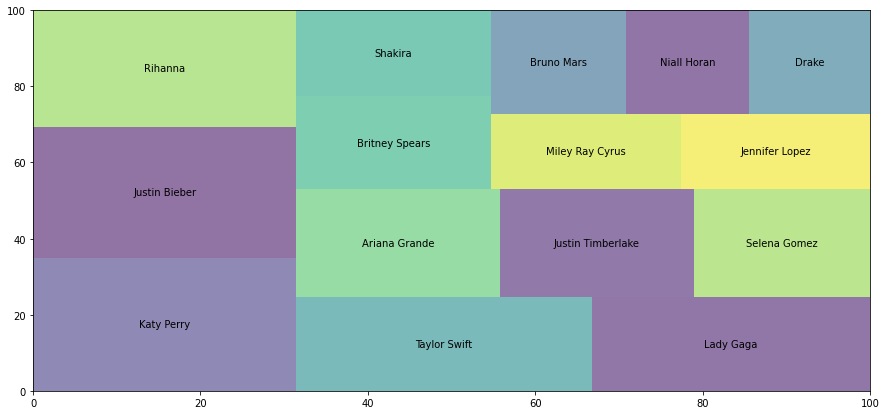

In [ ]:

import squarify
squarify.plot(sizes=y,label=x,alpha=0.6)
plt.rcParams['figure.figsize']=[15,7]

7. Most popular Bands

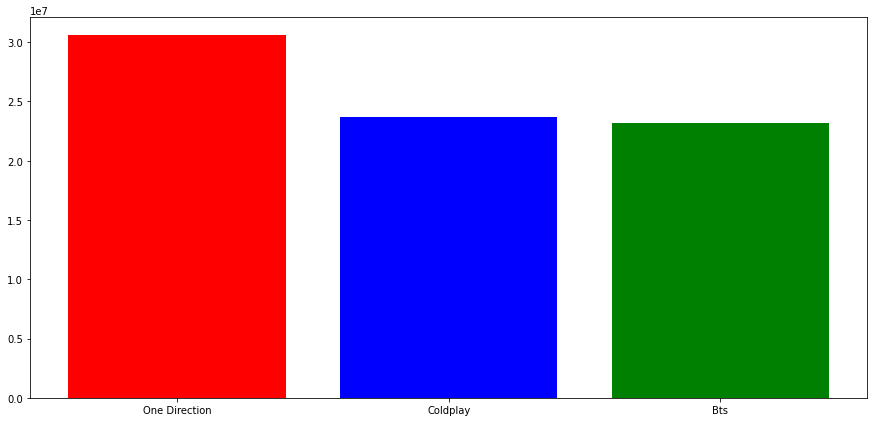

In [ ]:
data2=data[data['Activity']=='Band']
x=data2['Name']
y=data2['Followers']
plt.bar(x,y,color=["red","blue","green"])
#plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

8. Most followed Politicians/Offcial Political accounts

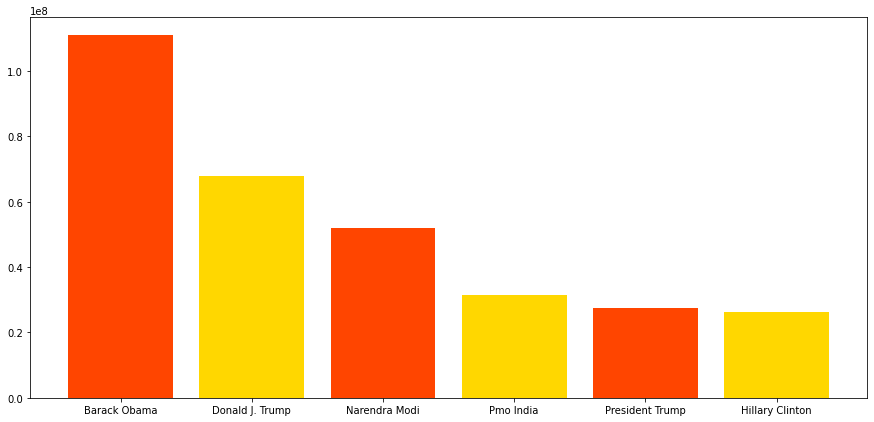

In [ ]:
data2=data[data['Activity']=='Politician']
x=data2['Name']
y=data2['Followers']
plt.bar(x,y,color=["orangered","gold"])
#plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

9. Most followed Sportspersons/Sports Club


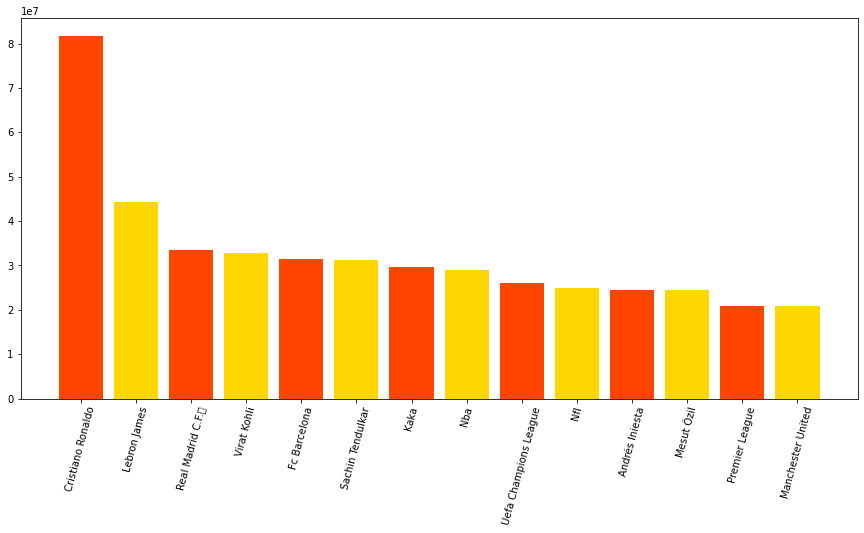

In [ ]:
data2=data[data['Industry']=="Sports"]
x=data2['Name']
y=data2['Followers']
plt.bar(x,y,color=["orangered","gold"])
plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

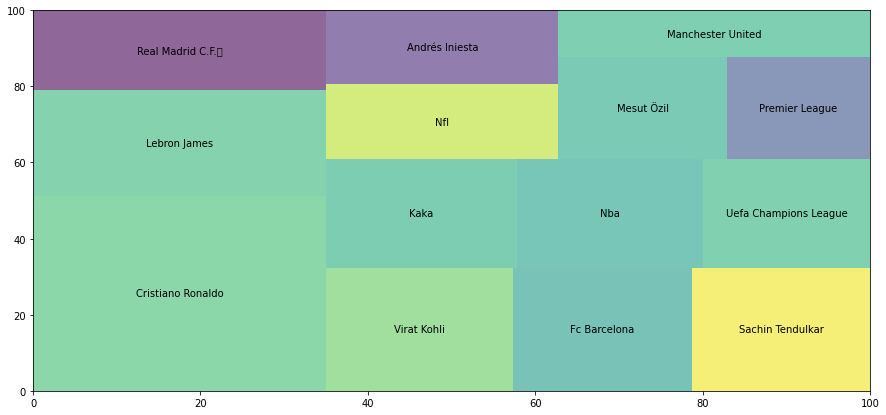

In [ ]:
squarify.plot(sizes=y,label=x,alpha=0.6)
plt.rcParams['figure.figsize']=[15,7]

10. Most followed Films/Entertainment industry personalities

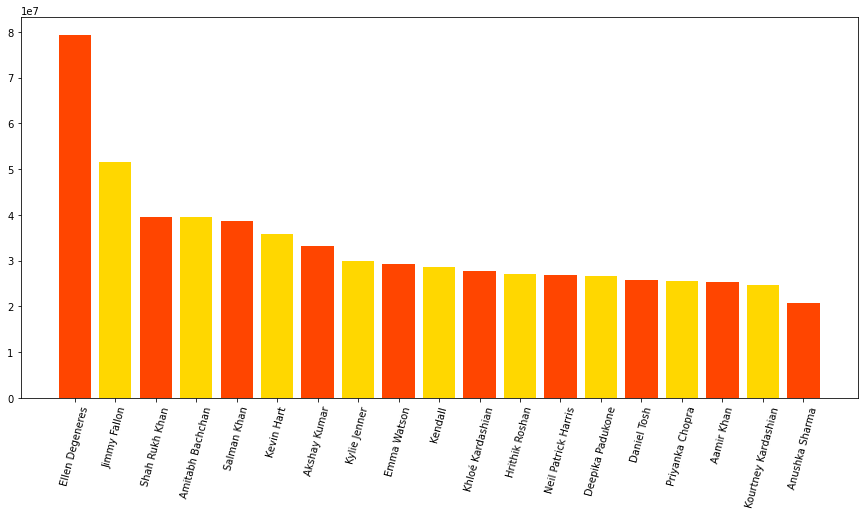

In [ ]:
data2=data[data['Industry']=="Films/Entertainment"]
x=data2['Name']
y=data2['Followers']
plt.bar(x,y,color=["orangered","gold"])
plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

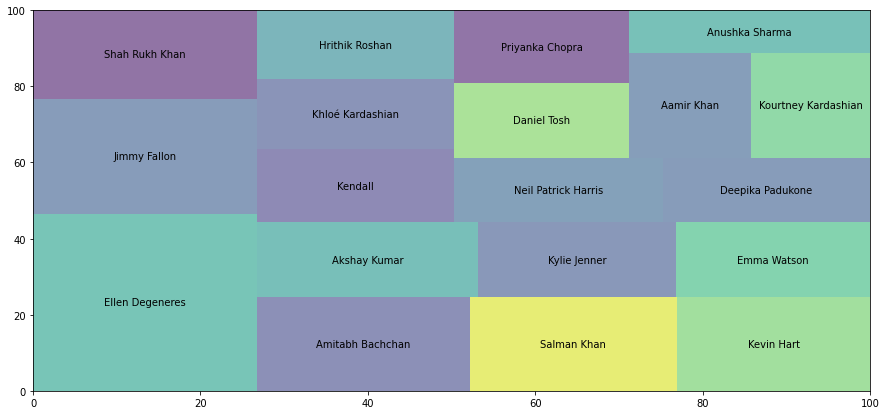

In [ ]:
squarify.plot(sizes=y,label=x,alpha=0.6)
plt.rcParams['figure.figsize']=[15,7]

11. Most Popular in U.S.A

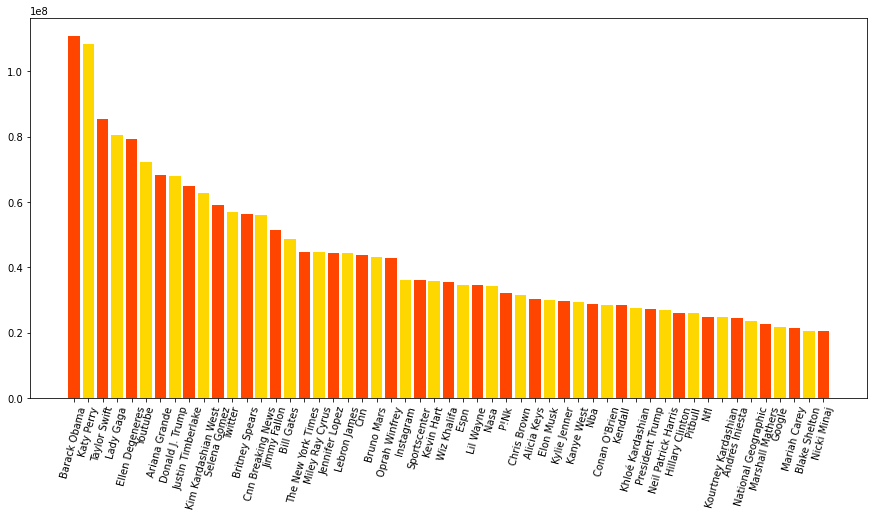

In [ ]:
data2=data[data['Nationality/headquarters']=="U.S.A"]
x=data2['Name']
y=data2['Followers']
plt.bar(x,y,color=["orangered","gold"])
plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()

12. Most Popular in India

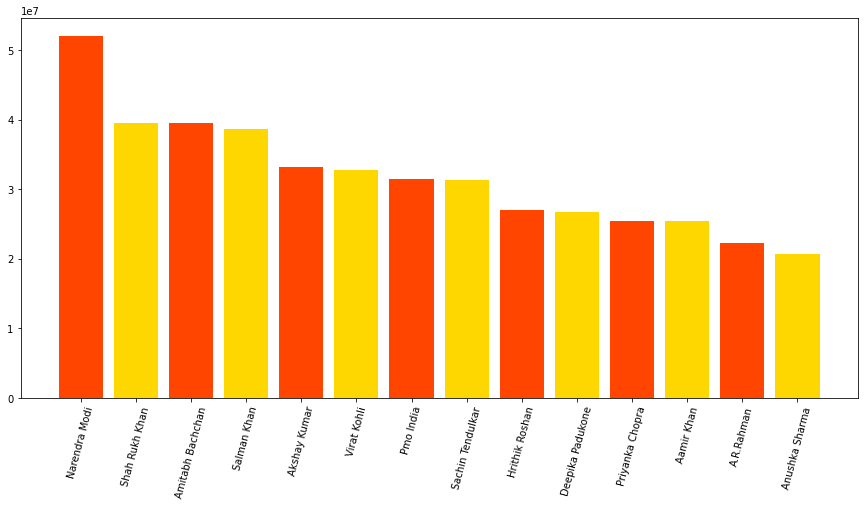

In [ ]:
data2=data[data['Nationality/headquarters']=="India"]
x=data2['Name']
y=data2['Followers']
plt.bar(x,y,color=["orangered","gold"])
plt.xticks(rotation=75)
#plt.figure(figsize=(200,150),dpi=300)
plt.rcParams['figure.figsize']=[15,7]
plt.show()
